<a href="https://colab.research.google.com/github/govind527/Pytorch_Practice/blob/main/Pytorch_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import sklearn

In [2]:
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [5]:
##make dataframe
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


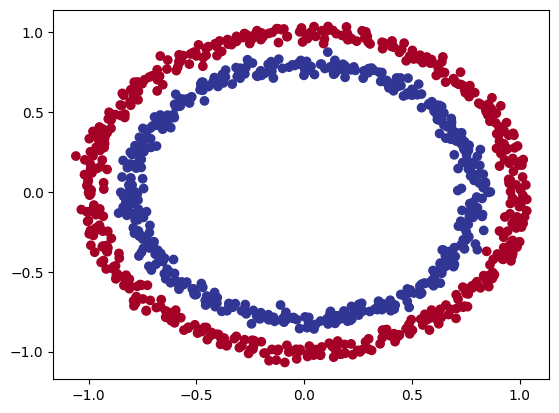

In [6]:
##visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [7]:
## check input and output shapes
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [10]:
## view first sample
X_sample=X[0]
y_sample=y[0]
print(f"Sample input of X: {X_sample} and sample output of y: {y_sample}")
print(f"type of X: {type(X_sample)} and type of y: {type(y_sample)}")
print(f"shape of X: {X_sample.shape} and shape of y: {y_sample.shape}")

Sample input of X: [0.75424625 0.23148074] and sample output of y: 1
type of X: <class 'numpy.ndarray'> and type of y: <class 'numpy.int64'>
shape of X: (2,) and shape of y: ()


In [11]:
##turn data into tensor and splitting
import torch
torch.__version__

'2.6.0+cu124'

In [12]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [13]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [14]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [15]:
## split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)


In [16]:
len(X_train),len(y_train)

(800, 800)

In [17]:
len(X_test),len(y_test)

(200, 200)

In [18]:
## Building a model
import torch
from torch import nn

device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [19]:
## subclass nn.Module and create a model

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=5)
        self.layer_2=nn.Linear(in_features=5,out_features=1)
    def forward(self,x):
        return self.layer_2(self.layer_1(x))

model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
## model replicate using nn.Sequencial

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
## make predictions
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6146, -0.5449],
                      [ 0.5884,  0.0224],
                      [-0.2155,  0.0688],
                      [-0.4998,  0.1873],
                      [-0.0396,  0.6335]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.0294,  0.4139, -0.3562, -0.2094,  0.1558], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.4238,  0.3105, -0.3370,  0.0959, -0.0802]], device='cuda:0')),
             ('1.bias', tensor([0.3456], device='cuda:0'))])

In [24]:
with torch.inference_mode():
  untrainded_preds=model_0(X_test.to(device))
print(f"lenght of predictions : {len(untrainded_preds)} and  shape: {untrainded_preds.shape}")
print(untrainded_preds[:10])
print(y_test[:10])

lenght of predictions : 200 and  shape: torch.Size([200, 1])
tensor([[0.2061],
        [0.3125],
        [0.3311],
        [0.1691],
        [0.9719],
        [1.0318],
        [0.8233],
        [0.9934],
        [0.3039],
        [0.3267]], device='cuda:0')
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [25]:
X[:10],y[:10]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [26]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [27]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [28]:
## raw logits --> prediction prob --> prediction table
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[0.2061],
        [0.3125],
        [0.3311],
        [0.1691],
        [0.9719]], device='cuda:0')

In [29]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5514],
        [0.5775],
        [0.5820],
        [0.5422],
        [0.7255]], device='cuda:0')

In [30]:
y_preds=torch.round(y_pred_probs)

y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

## checking for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

##get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [31]:
##3.Training a model
torch.cuda.manual_seed(42)
epochs=100

X_train, y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)
for epoch in range(epochs):
  model_0.train()
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) ## forward pass

  loss=loss_fn(y_logits,y_train) ## calculating loss
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred) ##  accuracy

  optimizer.zero_grad() ## optimizer zero grad

  loss.backward() ## backward loss

  optimizer.step() ## step step
##testing model
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    ##calculate loss and accuracy
    test_loss=loss_fn(test_logits,y_test)

    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%10==0:
    print(f" epoch: {epoch} | loss: {loss:.5f} | Acc : {acc:.2f}% | test_loss : {test_loss:.5f} | test_acc : {test_acc:.2f}%")

 epoch: 0 | loss: 0.74911 | Acc : 50.00% | test_loss : 0.73961 | test_acc : 51.00%
 epoch: 10 | loss: 0.71968 | Acc : 58.13% | test_loss : 0.71402 | test_acc : 59.50%
 epoch: 20 | loss: 0.70673 | Acc : 54.00% | test_loss : 0.70292 | test_acc : 55.50%
 epoch: 30 | loss: 0.70063 | Acc : 51.75% | test_loss : 0.69785 | test_acc : 56.50%
 epoch: 40 | loss: 0.69757 | Acc : 51.25% | test_loss : 0.69542 | test_acc : 55.50%
 epoch: 50 | loss: 0.69593 | Acc : 50.50% | test_loss : 0.69423 | test_acc : 53.50%
 epoch: 60 | loss: 0.69499 | Acc : 50.38% | test_loss : 0.69363 | test_acc : 53.00%
 epoch: 70 | loss: 0.69441 | Acc : 50.25% | test_loss : 0.69333 | test_acc : 52.00%
 epoch: 80 | loss: 0.69403 | Acc : 50.38% | test_loss : 0.69319 | test_acc : 51.00%
 epoch: 90 | loss: 0.69377 | Acc : 50.50% | test_loss : 0.69314 | test_acc : 50.00%


In [32]:
## make predictions



In [33]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



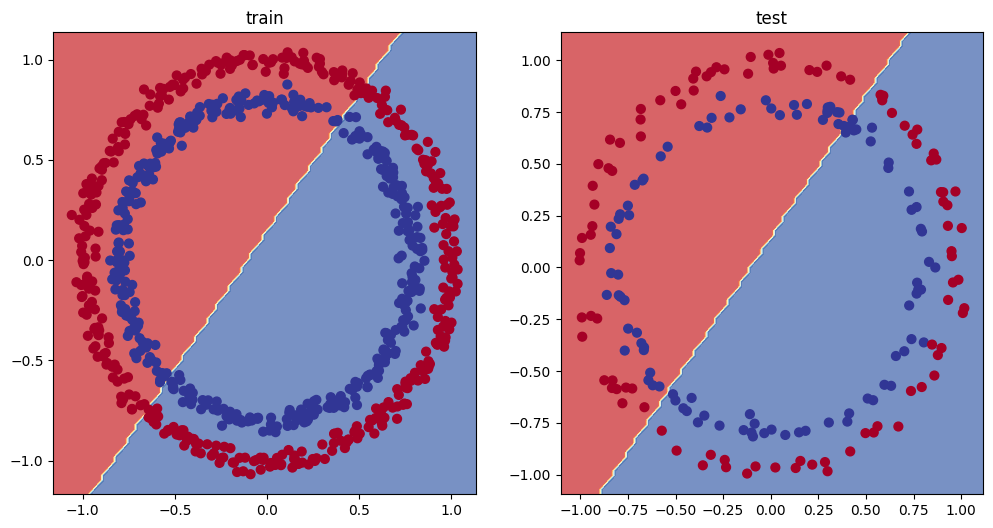

In [34]:
import numpy as np
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,X_test,y_test)

In [35]:
## improving model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x))) ## speedup operations using this way

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3693, -0.2248],
                      [-0.2553, -0.5438],
                      [ 0.6725,  0.1232],
                      [-0.4755,  0.2972],
                      [ 0.0963, -0.5047],
                      [-0.6573, -0.4068],
                      [ 0.2984,  0.1858],
                      [ 0.3078,  0.5456],
                      [ 0.5659,  0.0303],
                      [-0.1834,  0.6988]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.4399,  0.2274,  0.0719,  0.4036, -0.4903,  0.0078, -0.0007,  0.2758,
                      -0.4489, -0.4623], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.2150,  0.1053, -0.1743,  0.0392, -0.2091,  0.2270, -0.2030,  0.2273,
                       -0.0289,  0.2172],
                      [ 0.2155,  0.1017,  0.0560, -0.2630,  0.1973, -0.0012,  0.1458,  0.2759,
                       -0.3124, -0.2702],
                      [ 0.0400,  0.063

In [37]:
## loss function

loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [38]:
##training

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

##training

for epoch in range(epochs):
  model_1.train()

  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## testing

  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch%10==0:
    print(f" epoch: {epoch} | loss: {loss:.5f} | Acc : {acc:.2f}% | test_loss : {test_loss:.5f} | test_acc : {test_acc:.2f}%")

 epoch: 0 | loss: 0.69431 | Acc : 50.00% | test_loss : 0.69463 | test_acc : 50.00%
 epoch: 10 | loss: 0.69348 | Acc : 50.00% | test_loss : 0.69385 | test_acc : 50.00%
 epoch: 20 | loss: 0.69321 | Acc : 48.25% | test_loss : 0.69365 | test_acc : 46.50%
 epoch: 30 | loss: 0.69312 | Acc : 47.75% | test_loss : 0.69365 | test_acc : 46.00%
 epoch: 40 | loss: 0.69308 | Acc : 48.62% | test_loss : 0.69371 | test_acc : 49.00%
 epoch: 50 | loss: 0.69305 | Acc : 50.12% | test_loss : 0.69379 | test_acc : 48.00%
 epoch: 60 | loss: 0.69304 | Acc : 50.38% | test_loss : 0.69387 | test_acc : 48.00%
 epoch: 70 | loss: 0.69303 | Acc : 50.25% | test_loss : 0.69395 | test_acc : 47.50%
 epoch: 80 | loss: 0.69302 | Acc : 50.88% | test_loss : 0.69402 | test_acc : 46.00%
 epoch: 90 | loss: 0.69301 | Acc : 51.00% | test_loss : 0.69409 | test_acc : 46.00%
 epoch: 100 | loss: 0.69300 | Acc : 50.75% | test_loss : 0.69415 | test_acc : 46.50%
 epoch: 110 | loss: 0.69300 | Acc : 50.88% | test_loss : 0.69420 | test_acc 

In [39]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3700, -0.2201],
                      [-0.2549, -0.5470],
                      [ 0.6714,  0.1312],
                      [-0.4748,  0.2921],
                      [ 0.0970, -0.5095],
                      [-0.6584, -0.3990],
                      [ 0.2984,  0.1857],
                      [ 0.3066,  0.5547],
                      [ 0.5666,  0.0246],
                      [-0.1828,  0.6944]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.4362,  0.2253,  0.0777,  0.3996, -0.4933,  0.0131, -0.0008,  0.2818,
                      -0.4527, -0.4656], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.2231,  0.0992, -0.1728,  0.0501, -0.2238,  0.2217, -0.2005,  0.2393,
                       -0.0350,  0.2242],
                      [ 0.2067,  0.0954,  0.0576, -0.2512,  0.1814, -0.0068,  0.1484,  0.2888,
                       -0.3192, -0.2631],
                      [ 0.0365,  0.061

In [40]:
next(model_1.parameters()).device

device(type='cuda', index=0)

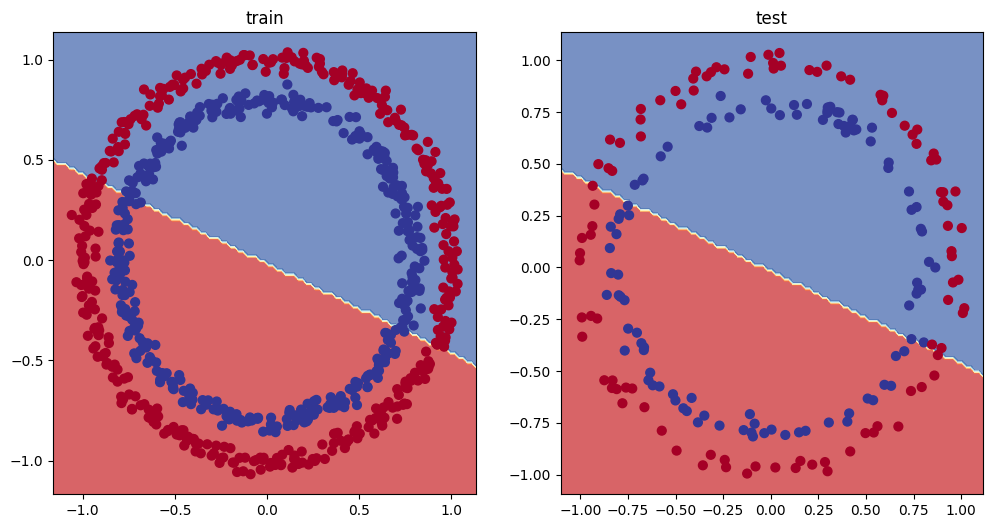

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,X_test,y_test)

## recreating non linear data

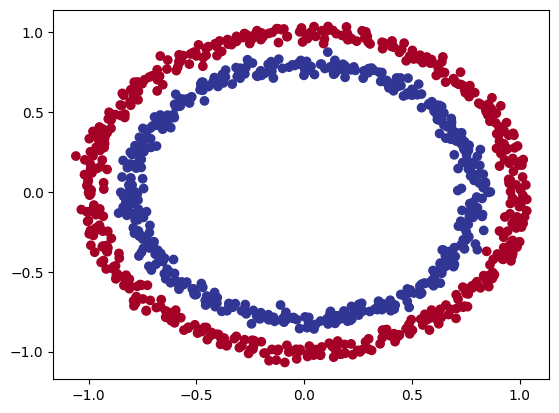

In [50]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [51]:
## converting data to tensor and train test split
import torch
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [52]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [61]:
## building model with non linearity

from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [54]:
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [56]:
## training model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

epochs=1000

for epoch in range(epochs):
  model_3.train()
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))


  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
## testing
  model_3.eval()

  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch%10==0:
    print(f" epoch: {epoch} | loss: {loss:.5f} | Acc : {acc:.2f}% | test_loss : {test_loss:.5f} | test_acc : {test_acc:.2f}%")



 epoch: 0 | loss: 0.69289 | Acc : 50.00% | test_loss : 0.69312 | test_acc : 50.00%
 epoch: 10 | loss: 0.69244 | Acc : 51.00% | test_loss : 0.69255 | test_acc : 50.00%
 epoch: 20 | loss: 0.69223 | Acc : 59.75% | test_loss : 0.69229 | test_acc : 58.00%
 epoch: 30 | loss: 0.69208 | Acc : 71.00% | test_loss : 0.69210 | test_acc : 69.50%
 epoch: 40 | loss: 0.69193 | Acc : 66.62% | test_loss : 0.69193 | test_acc : 70.50%
 epoch: 50 | loss: 0.69179 | Acc : 57.50% | test_loss : 0.69175 | test_acc : 58.00%
 epoch: 60 | loss: 0.69166 | Acc : 53.50% | test_loss : 0.69160 | test_acc : 54.50%
 epoch: 70 | loss: 0.69153 | Acc : 53.00% | test_loss : 0.69145 | test_acc : 52.50%
 epoch: 80 | loss: 0.69140 | Acc : 52.62% | test_loss : 0.69130 | test_acc : 53.00%
 epoch: 90 | loss: 0.69127 | Acc : 52.75% | test_loss : 0.69115 | test_acc : 53.00%
 epoch: 100 | loss: 0.69114 | Acc : 52.88% | test_loss : 0.69101 | test_acc : 52.50%
 epoch: 110 | loss: 0.69101 | Acc : 52.88% | test_loss : 0.69087 | test_acc 

In [62]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test.to(device)))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [63]:
next(model_3.parameters()).device

device(type='cuda', index=0)

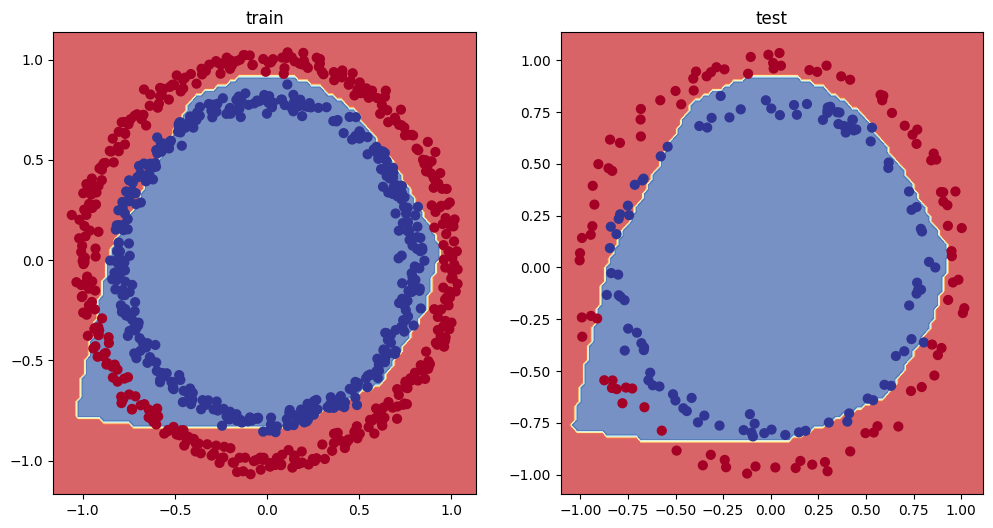

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)